# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [352]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline
with open('sat_scores.csv') as f:
    reader = csv.reader(f)
    data_python_version = []
    for row in reader:
        data_python_version.append(row)
print(data_python_version)
print(len(data_python_version))


[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [353]:
import pandas as pd
data_panda_version = pd.read_csv('sat_scores.csv', sep=',')
print(data_panda_version)


   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12

##### 1. What does the data describe?

The data describe the avarage grade of students in math and verbal in different states

##### 2. Does the data look complete? Are there any obvious issues with the observations?

There is an extra row locates at the end of the dataset.
I will remove the last row.


In [354]:
data_panda_version.describe(include='all')


,State,Rate,Verbal,Math
count,52,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN
top,SD,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,37.153846,532.019231,531.500000
std,NaN,27.301788,33.236225,36.014975
min,NaN,4.000000,482.000000,439.000000
25%,NaN,9.000000,501.000000,504.000000
50%,NaN,33.500000,526.500000,521.000000
75%,NaN,63.500000,562.000000,555.750000


In [355]:
data_panda_version.shape


(52, 4)

In [356]:
data_panda_version.drop(data_panda_version.index[[51]],inplace = True)
data_panda_version_no_last = data_panda_version
data_panda_version_no_last.shape


(51, 4)

In [357]:
data_panda_version_no_last


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


##### 3. Create a data dictionary for the dataset. (from python version data)

In [358]:
header = data_python_version[0]
data = data_python_version[1:]
print(header)


['State', 'Rate', 'Verbal', 'Math']


In [359]:
grade_dic = {}

for index, column_name in enumerate(header):
    grade_dic[column_name] = []
    for row in data:
        grade_dic[column_name].append(row[index])
        

In [360]:
print(grade_dic)


{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

## Step 2: Load the data.

##### 4. Load the data into a list of lists

##### 5. Print the data

In [361]:
print(data_python_version)


[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [362]:
len(data_python_version)


53

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [363]:
data_python_version_no_title = data_python_version[1:]


In [364]:
data_python_version_no_title 


[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL', '12', '576', '589'],
 ['KY', '12', 

In [365]:
len(data_python_version_no_title )


52

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [366]:
name_state = []
for ii in range(len(data_python_version_no_title)):
    name_state.append(data_python_version_no_title[ii][0])
    
    

In [367]:
print(name_state)


['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


In [368]:
len(name_state)


52

##### 8. Print the types of each column

In [369]:
type(data_python_version_no_title[1][1])



str

In [370]:
type(data_python_version_no_title[1][2])


str

In [371]:
type(data_python_version_no_title[1][3])


str

In [372]:
for ii in range(len(data_python_version_no_title)):
    data_python_version_no_title[ii][1] = int(data_python_version_no_title[ii][1])
    data_python_version_no_title[ii][2] = int(data_python_version_no_title[ii][2])
    data_python_version_no_title[ii][3] = int(data_python_version_no_title[ii][3])
    
    

In [373]:
type(data_python_version_no_title[1][1])


int

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [374]:
data_python_version_no_title.pop(len(data_python_version_no_title)-1)


['All', 45, 506, 514]

In [375]:
data_python_version_no_title_no_end = data_python_version_no_title


In [376]:
len(data_python_version_no_title_no_end)


51

In [377]:
data_python_version_no_title_no_end


[['CT', 82, 509, 510],
 ['NJ', 81, 499, 513],
 ['MA', 79, 511, 515],
 ['NY', 77, 495, 505],
 ['NH', 72, 520, 516],
 ['RI', 71, 501, 499],
 ['PA', 71, 500, 499],
 ['VT', 69, 511, 506],
 ['ME', 69, 506, 500],
 ['VA', 68, 510, 501],
 ['DE', 67, 501, 499],
 ['MD', 65, 508, 510],
 ['NC', 65, 493, 499],
 ['GA', 63, 491, 489],
 ['IN', 60, 499, 501],
 ['SC', 57, 486, 488],
 ['DC', 56, 482, 474],
 ['OR', 55, 526, 526],
 ['FL', 54, 498, 499],
 ['WA', 53, 527, 527],
 ['TX', 53, 493, 499],
 ['HI', 52, 485, 515],
 ['AK', 51, 514, 510],
 ['CA', 51, 498, 517],
 ['AZ', 34, 523, 525],
 ['NV', 33, 509, 515],
 ['CO', 31, 539, 542],
 ['OH', 26, 534, 439],
 ['MT', 23, 539, 539],
 ['WV', 18, 527, 512],
 ['ID', 17, 543, 542],
 ['TN', 13, 562, 553],
 ['NM', 13, 551, 542],
 ['IL', 12, 576, 589],
 ['KY', 12, 550, 550],
 ['WY', 11, 547, 545],
 ['MI', 11, 561, 572],
 ['MN', 9, 580, 589],
 ['KS', 9, 577, 580],
 ['AL', 9, 559, 554],
 ['NE', 8, 562, 568],
 ['OK', 8, 567, 561],
 ['MO', 8, 577, 577],
 ['LA', 7, 564, 5

In [378]:
header_2 = []
d = data_python_version_no_title_no_end
for row in d:
    header_2.append(row[0])
    del row[0]
   
data_2= d


In [379]:
data_2


[[82, 509, 510],
 [81, 499, 513],
 [79, 511, 515],
 [77, 495, 505],
 [72, 520, 516],
 [71, 501, 499],
 [71, 500, 499],
 [69, 511, 506],
 [69, 506, 500],
 [68, 510, 501],
 [67, 501, 499],
 [65, 508, 510],
 [65, 493, 499],
 [63, 491, 489],
 [60, 499, 501],
 [57, 486, 488],
 [56, 482, 474],
 [55, 526, 526],
 [54, 498, 499],
 [53, 527, 527],
 [53, 493, 499],
 [52, 485, 515],
 [51, 514, 510],
 [51, 498, 517],
 [34, 523, 525],
 [33, 509, 515],
 [31, 539, 542],
 [26, 534, 439],
 [23, 539, 539],
 [18, 527, 512],
 [17, 543, 542],
 [13, 562, 553],
 [13, 551, 542],
 [12, 576, 589],
 [12, 550, 550],
 [11, 547, 545],
 [11, 561, 572],
 [9, 580, 589],
 [9, 577, 580],
 [9, 559, 554],
 [8, 562, 568],
 [8, 567, 561],
 [8, 577, 577],
 [7, 564, 562],
 [6, 584, 596],
 [6, 562, 550],
 [5, 575, 570],
 [5, 593, 603],
 [4, 577, 582],
 [4, 592, 599],
 [4, 566, 551]]

In [380]:
professions_dict = {}
for i in range(len(header_2)):
    professions_dict[header_2[i]] = data_2[i]
    

In [381]:
professions_dict


{'AK': [51, 514, 510],
 'AL': [9, 559, 554],
 'AR': [6, 562, 550],
 'AZ': [34, 523, 525],
 'CA': [51, 498, 517],
 'CO': [31, 539, 542],
 'CT': [82, 509, 510],
 'DC': [56, 482, 474],
 'DE': [67, 501, 499],
 'FL': [54, 498, 499],
 'GA': [63, 491, 489],
 'HI': [52, 485, 515],
 'IA': [5, 593, 603],
 'ID': [17, 543, 542],
 'IL': [12, 576, 589],
 'IN': [60, 499, 501],
 'KS': [9, 577, 580],
 'KY': [12, 550, 550],
 'LA': [7, 564, 562],
 'MA': [79, 511, 515],
 'MD': [65, 508, 510],
 'ME': [69, 506, 500],
 'MI': [11, 561, 572],
 'MN': [9, 580, 589],
 'MO': [8, 577, 577],
 'MS': [4, 566, 551],
 'MT': [23, 539, 539],
 'NC': [65, 493, 499],
 'ND': [4, 592, 599],
 'NE': [8, 562, 568],
 'NH': [72, 520, 516],
 'NJ': [81, 499, 513],
 'NM': [13, 551, 542],
 'NV': [33, 509, 515],
 'NY': [77, 495, 505],
 'OH': [26, 534, 439],
 'OK': [8, 567, 561],
 'OR': [55, 526, 526],
 'PA': [71, 500, 499],
 'RI': [71, 501, 499],
 'SC': [57, 486, 488],
 'SD': [4, 577, 582],
 'TN': [13, 562, 553],
 'TX': [53, 493, 499],


In [382]:
data_2

[[82, 509, 510],
 [81, 499, 513],
 [79, 511, 515],
 [77, 495, 505],
 [72, 520, 516],
 [71, 501, 499],
 [71, 500, 499],
 [69, 511, 506],
 [69, 506, 500],
 [68, 510, 501],
 [67, 501, 499],
 [65, 508, 510],
 [65, 493, 499],
 [63, 491, 489],
 [60, 499, 501],
 [57, 486, 488],
 [56, 482, 474],
 [55, 526, 526],
 [54, 498, 499],
 [53, 527, 527],
 [53, 493, 499],
 [52, 485, 515],
 [51, 514, 510],
 [51, 498, 517],
 [34, 523, 525],
 [33, 509, 515],
 [31, 539, 542],
 [26, 534, 439],
 [23, 539, 539],
 [18, 527, 512],
 [17, 543, 542],
 [13, 562, 553],
 [13, 551, 542],
 [12, 576, 589],
 [12, 550, 550],
 [11, 547, 545],
 [11, 561, 572],
 [9, 580, 589],
 [9, 577, 580],
 [9, 559, 554],
 [8, 562, 568],
 [8, 567, 561],
 [8, 577, 577],
 [7, 564, 562],
 [6, 584, 596],
 [6, 562, 550],
 [5, 575, 570],
 [5, 593, 603],
 [4, 577, 582],
 [4, 592, 599],
 [4, 566, 551]]

##### 11. Create a dictionary with the values for each of the numeric columns

In [383]:
X = data
d = {}

for path in X:
    current_level = d
    for part in path:
        if part not in current_level:
            current_level[part] = {}
        current_level = current_level[part]
d

{4: {566: {551: {}}, 577: {582: {}}, 592: {599: {}}},
 5: {575: {570: {}}, 593: {603: {}}},
 6: {562: {550: {}}, 584: {596: {}}},
 7: {564: {562: {}}},
 8: {562: {568: {}}, 567: {561: {}}, 577: {577: {}}},
 9: {559: {554: {}}, 577: {580: {}}, 580: {589: {}}},
 11: {547: {545: {}}, 561: {572: {}}},
 12: {550: {550: {}}, 576: {589: {}}},
 13: {551: {542: {}}, 562: {553: {}}},
 17: {543: {542: {}}},
 18: {527: {512: {}}},
 23: {539: {539: {}}},
 26: {534: {439: {}}},
 31: {539: {542: {}}},
 33: {509: {515: {}}},
 34: {523: {525: {}}},
 51: {498: {517: {}}, 514: {510: {}}},
 52: {485: {515: {}}},
 53: {493: {499: {}}, 527: {527: {}}},
 54: {498: {499: {}}},
 55: {526: {526: {}}},
 56: {482: {474: {}}},
 57: {486: {488: {}}},
 60: {499: {501: {}}},
 63: {491: {489: {}}},
 65: {493: {499: {}}, 508: {510: {}}},
 67: {501: {499: {}}},
 68: {510: {501: {}}},
 69: {506: {500: {}}, 511: {506: {}}},
 71: {500: {499: {}}, 501: {499: {}}},
 72: {520: {516: {}}},
 77: {495: {505: {}}},
 79: {511: {51

In [384]:
data_panda_version_no_last


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [385]:
data_panda_version_no_last.loc[data_panda_version_no_last['Rate'].idxmax()]


State      CT
Rate       82
Verbal    509
Math      510
Name: 0, dtype: object

In [386]:
data_panda_version_no_last.loc[data_panda_version_no_last['Math'].idxmax()]


State      IA
Rate        5
Verbal    593
Math      603
Name: 47, dtype: object

In [153]:
data_panda_version_no_last.loc[data_panda_version_no_last['Verbal'].idxmax()]

State      IA
Rate        5
Verbal    593
Math      603
Name: 47, dtype: object

In [154]:
data_panda_version_no_last.loc[data_panda_version_no_last['Math'].idxmin()]

State      OH
Rate       26
Verbal    534
Math      439
Name: 27, dtype: object

In [155]:
data_panda_version_no_last.loc[data_panda_version_no_last['Verbal'].idxmin()]

State      DC
Rate       56
Verbal    482
Math      474
Name: 16, dtype: object

In [156]:
data_panda_version_no_last.loc[data_panda_version_no_last['Rate'].idxmax()]

State      CT
Rate       82
Verbal    509
Math      510
Name: 0, dtype: object

##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [166]:
from math import sqrt
def mean(lst):
    """calculates mean"""
    return sum(lst) / len(lst)

def stddev(lst):
    """returns the standard deviation of lst"""
    mn = mean(lst)
    variance = sum([(e-mn)**2 for e in lst]) / len(lst)
    return sqrt(variance)

In [172]:
mean(data_panda_version_no_last['Rate'])

37

In [173]:
mean(data_panda_version_no_last['Math'])

531

In [174]:
mean(data_panda_version_no_last['Verbal'])

532

In [175]:
stddev(data_panda_version_no_last['Rate'])

27.27636339397171

In [176]:
stddev(data_panda_version_no_last['Math'])

35.93048844644336

In [177]:
stddev(data_panda_version_no_last['Rate'])

27.27636339397171

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [250]:
import matplotlib
import matplotlib.pyplot as pyplot

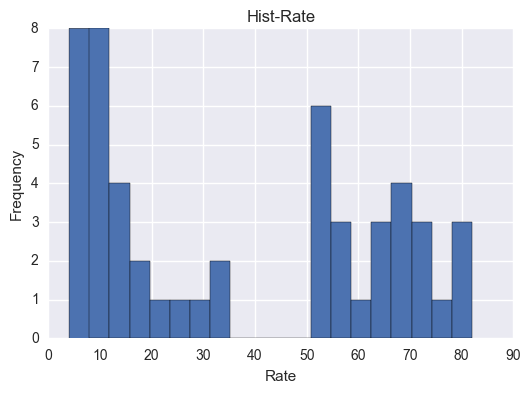

In [271]:
data_panda_version_no_last.Rate.plot(kind='hist', bins=20)
pyplot.title('Hist-Rate')
pyplot.xlabel('Rate')
pyplot.ylabel('Frequency')
pyplot.savefig('HIst-rate')


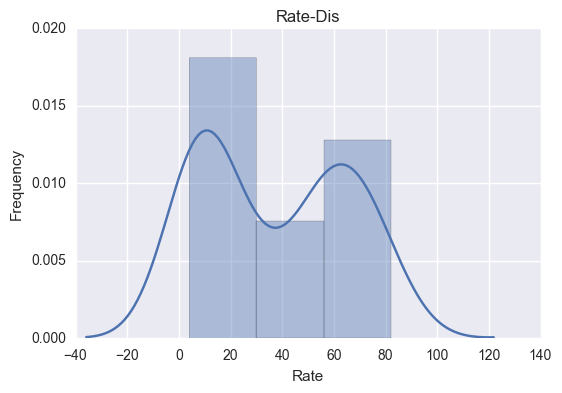

In [255]:
sns.distplot(data_panda_version_no_last['Rate'])
pyplot.title('Rate-Dis')
pyplot.xlabel('Rate')
pyplot.ylabel('Frequency')
pyplot.savefig('Rate-Dis')

##### 15. Plot the Math distribution

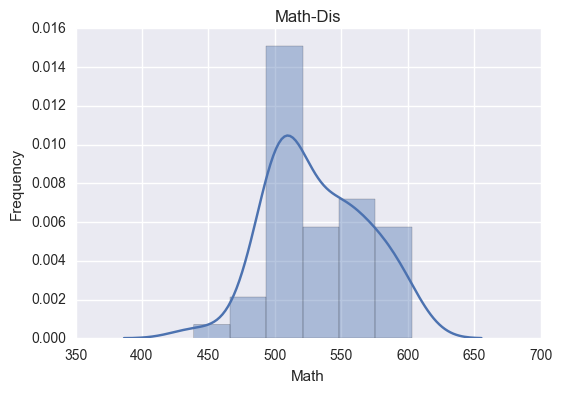

In [256]:
sns.distplot(data_panda_version_no_last['Math'])
pyplot.title('Math-Dis')
pyplot.xlabel('Math')
pyplot.ylabel('Frequency')
pyplot.savefig('Math-Dis')

##### 16. Plot the Verbal distribution

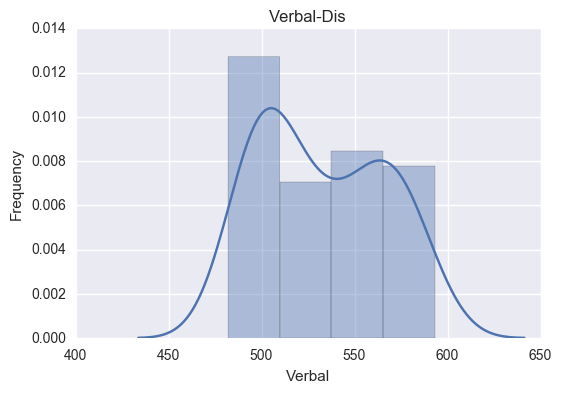

In [257]:
sns.distplot(data_panda_version_no_last['Verbal'])
pyplot.title('Verbal-Dis')
pyplot.xlabel('Verbal')
pyplot.ylabel('Frequency')
pyplot.savefig('Verbal-Dis')

##### 17. What is the typical assumption for data distribution?

They are continuous

##### 18. Does that distribution hold true for our data?

no

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

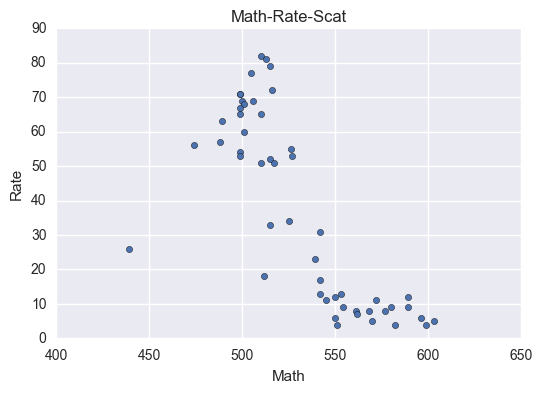

In [258]:
data_panda_version_no_last.plot(kind='scatter', x='Math', y='Rate')
pyplot.title('Math-Rate-Scat')
pyplot.xlabel('Math')
pyplot.ylabel('Rate')
pyplot.savefig('Math-Rate-Scat')

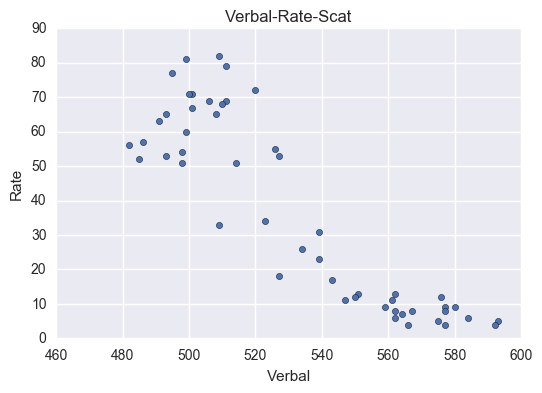

In [259]:
data_panda_version_no_last.plot(kind='scatter', x='Verbal', y='Rate')
pyplot.title('Verbal-Rate-Scat')
pyplot.xlabel('Verbal')
pyplot.ylabel('Rate')
pyplot.savefig('Verbal-Rate-Scat')

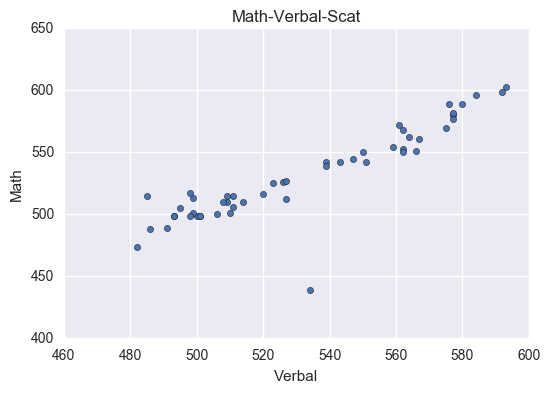

In [260]:
data_panda_version_no_last.plot(kind='scatter', x='Verbal', y='Math')
pyplot.title('Math-Verbal-Scat')
pyplot.xlabel('Verbal')
pyplot.ylabel('Math')
pyplot.savefig('Math-Verbal-Scat')

##### 20. Are there any interesting relationships to note?

higher rate lower math and verbal grade 
higher math results higher verbal

##### 21. Create box plots for each variable. 

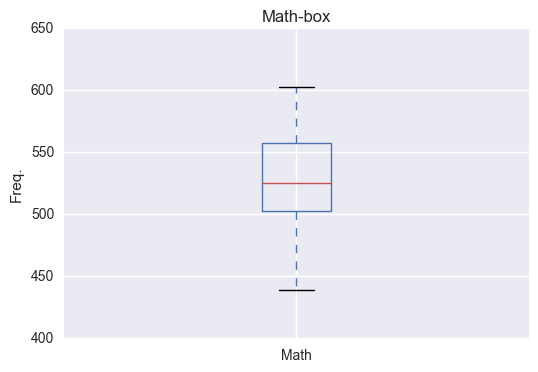

In [264]:
data_panda_version_no_last.Math.plot(kind='box')

pyplot.title('Math-box')
#pyplot.xlabel('Math')
pyplot.ylabel('Freq.')
pyplot.savefig('Math-box')

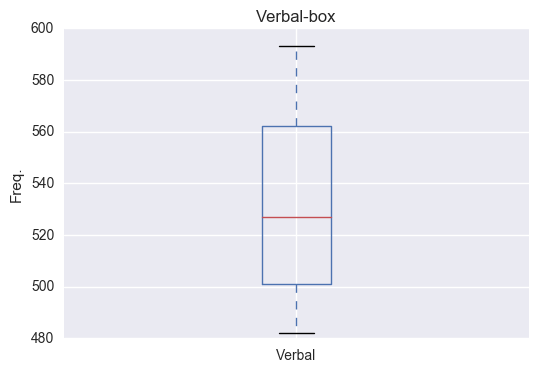

In [263]:
data_panda_version_no_last.Verbal.plot(kind='box')
pyplot.title('Verbal-box')
#pyplot.xlabel('Verbal')
pyplot.ylabel('Freq.')
pyplot.savefig('Verbal-box')



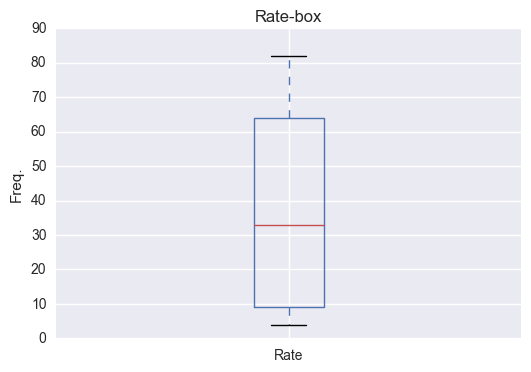

In [265]:
data_panda_version_no_last.Rate.plot(kind='box')
pyplot.title('Rate-box')
#pyplot.xlabel('Verbal')
pyplot.ylabel('Freq.')
pyplot.savefig('Rate-box')

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

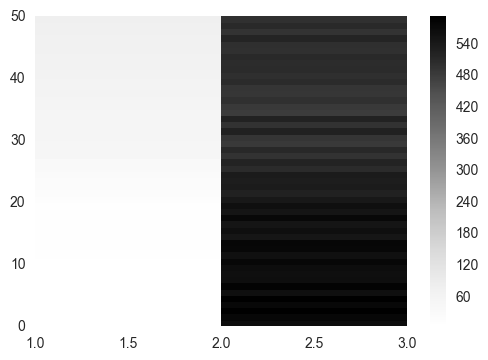

In [269]:
import matplotlib.pyplot as plt
import numpy as np

#here's our data to plot, all normal Python lists
x = [1, 2, 3]
y = range(len(data_2))

intensity = data_2

#setup the 2D grid with Numpy
x, y = np.meshgrid(x, y)

#convert intensity (list of lists) to a numpy array for plotting
intensity = np.array(intensity)

#now just plug the data into pcolormesh, it's that easy!
plt.pcolormesh(x, y, intensity)
plt.colorbar() #need a colorbar to show the intensity scale
plt.show() #boom